<h1><center>CSCI - 4146 & 6409 - The Process of Data Science - Summer 2022</h1></center>
<h1><center>Assignment 1</h1></center>

<b>Meghna Kumar</b>  
B00892970 

<b>Vatsal Yadav</b>  
B00893030  

### 1.Data Exploration and preprocessing

1. Data Quality Report

- Read all csv files from the provided dataset for "Australia and Investigative special wildfires data" <a href='https://www.kaggle.com/datasets/brsdincer/australia-and-investigative-special-wildfires-data'>[1]</a> and merge to create a dataframe.

In [1]:
import pandas as pnd
import numpy as np

# to store multiple files
import glob

#to ignore waenings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#to plot graphs and maps
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import learning_curve

from math import sqrt
# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae

# Random Forest Algorithm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

#To perform statistical significance test
from mlxtend.evaluate import paired_ttest_5x2cv

In [2]:
# Set options to avoid truncation when displaying a dataframe
# Code Reference: This code has been taken from CSCI 6709 Process of Data Science Tutorial 2 [2]
# Code Reference: https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe [3]
pnd.set_option("display.max_rows", None)
pnd.set_option("display.max_columns", None)
pnd.set_option('display.float_format', '{:.2f}'.format)

df=[]
filePath="/"
files=glob.glob(filePath+"/*.csv")

for file in files:
  df.append(pnd.read_csv(file))

data_frame=pnd.concat(df,ignore_index=True)

data_frame = data_frame.convert_dtypes()
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046679 entries, 0 to 1046678
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   latitude    1046679 non-null  Float64
 1   longitude   1046679 non-null  Float64
 2   brightness  1046679 non-null  Float64
 3   scan        1046679 non-null  Float64
 4   track       1046679 non-null  Float64
 5   acq_date    1046679 non-null  string 
 6   acq_time    1046679 non-null  Int64  
 7   satellite   1046679 non-null  string 
 8   instrument  1046679 non-null  string 
 9   confidence  1046679 non-null  Int64  
 10  version     1046679 non-null  Float64
 11  bright_t31  1046679 non-null  Float64
 12  frp         1046679 non-null  Float64
 13  daynight    1046679 non-null  string 
 14  type        1046679 non-null  Int64  
dtypes: Float64(8), Int64(3), string(4)
memory usage: 130.8 MB


> **a. Data quality reports for the continuous features and categorical features by using code from Tutorial 2 - CSCI-6409 Process of Data Science.**






*   Continuous Features

In [3]:
#Code Reference: This code has been taken from CSCI 6709 Process of Data Science Tutorial 2 [2]
def build_continuous_features_report(data_df):
    
    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pnd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [4]:
build_continuous_features_report(data_frame)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
latitude,1046679,0.00,259382,-43.50,-28.77,-21.96,-19.92,-15.30,-9.25,7.79
longitude,1046679,0.00,325532,113.13,126.80,135.25,133.14,144.96,153.59,10.52
brightness,1046679,0.00,2050,300.00,317.90,332.88,328.70,341.60,507.00,23.11
scan,1046679,0.00,39,1.00,1.10,1.66,1.30,1.90,4.80,0.85
track,1046679,0.00,11,1.00,1.00,1.23,1.10,1.40,2.00,0.26
acq_time,1046679,0.00,855,0.00,225.00,622.02,444.00,629.00,2359.00,532.04
confidence,1046679,0.00,101,0.00,56.00,71.06,74.00,90.00,100.00,22.92
version,1046679,0.00,2,6.03,6.03,6.07,6.03,6.20,6.20,0.07
bright_t31,1046679,0.00,972,265.70,295.90,303.23,303.00,309.80,400.10,10.73
frp,1046679,0.00,13993,-29.90,14.60,70.50,28.60,63.50,11164.10,169.47


> Observations
> * The maximum value of 'frp' is 11164.10
> * The features with lowest cardinalities are 'version' and 'type' with a cardinality of 2 and 3 respectively.
> * Version has the lowest standard deviation
> * Since the count value is same for all the features it can be inferred that there are no missing values for any of them

*   Categorical features

In [5]:
#Code Reference: This code has been taken from CSCI 6709 Process of Data Science Tutorial 2 [2]
def build_categorical_features_report(data_df):

    """Build tabular report for categorical features"""

    def _mode(df):
        return df.apply(lambda ft: ft.mode().to_list()).T

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list())

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    cat_feat_names = data_df.select_dtypes(exclude="number").columns
    continuous_data_df = data_df[cat_feat_names]

    report_df = pnd.DataFrame(index=cat_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [6]:
build_categorical_features_report(data_frame)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
acq_date,1046679,0.00,1461,2020-01-04,7351,0.70,[2019-12-30],6925,0.66
satellite,1046679,0.00,2,Aqua,600236,57.35,[Terra],446443,42.65
instrument,1046679,0.00,1,MODIS,1046679,100.00,[],0,0.00
daynight,1046679,0.00,2,D,806375,77.04,[N],240304,22.96


> Observations
> * The count value is same for all the features indicating there are no missing values in any continuous features.
> * The cardinality of 'instrument' is 1 and it doesn't have a second mode as well, which means instruments has only one type of value - 'MODIS'
> * 'acq_date' has the highest cardinality among all the continuous features

> Feature visualization - Continuous Features



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f246f9f62d0>,
      dtype=object)

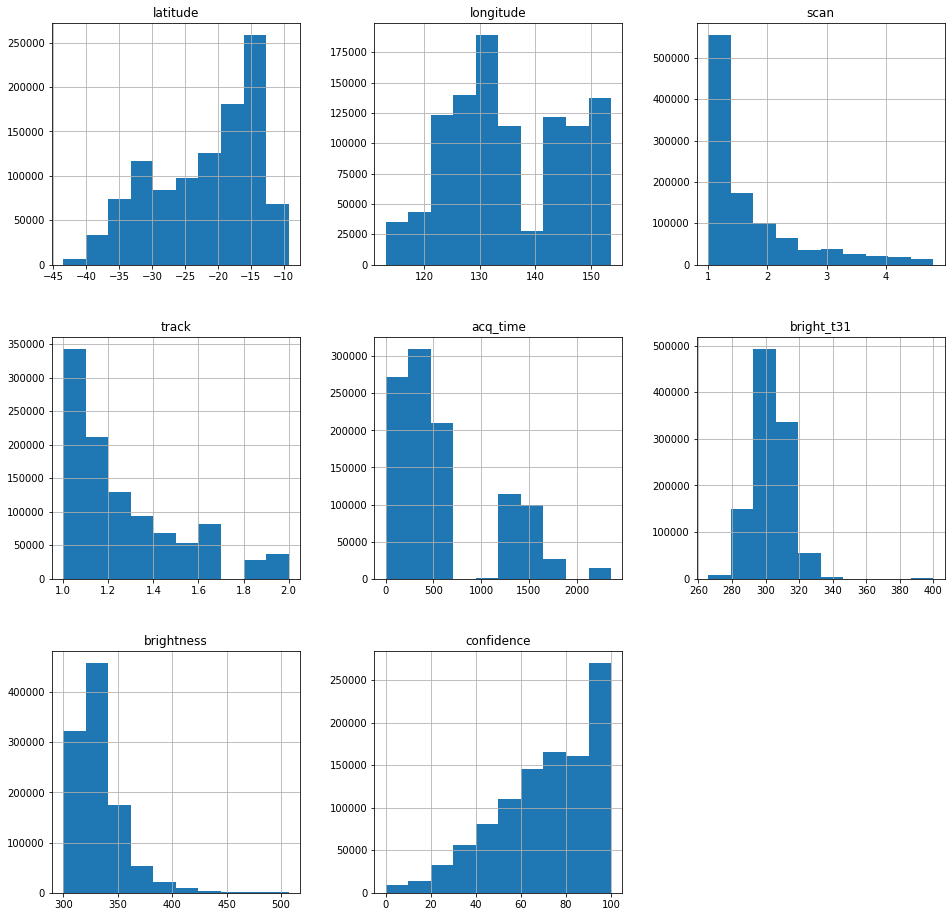

In [ ]:
data_frame.hist(column=(['latitude', 'longitude', 'scan', 'track', 'acq_time', 'bright_t31', 'brightness', 'confidence']),figsize=(16,16))



> From the above visualizations for the continuous feature, following obervations can be made:


> From the histogram of 'brightness' it can be observed -
> * More than 300000 incidents have brightness within 340
> * Very few incidents have brightness beyond 360 with almost negligible incidents with brightness 450-500


> From the histogram of 'acq_time' it can be observed -
> * There are no incidents for the acq_time value from approx 600 - 900
> * From approx 300-390, the number of incidents are more than 300000


> From the histogram of 'track' it can be observed - 
> * Number of incidents is 0 for track value between 1.7-1.8










> Feature visualization - Categorical Features

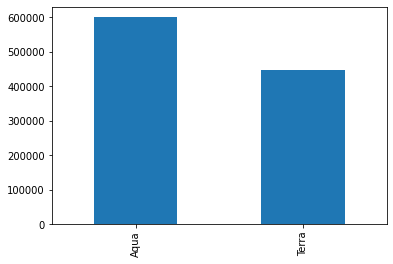

In [ ]:
data_frame['satellite'].value_counts().plot.bar();

> Observation
> * The number of incidents happening in Aqua region are more in comparison to those happened in Terra

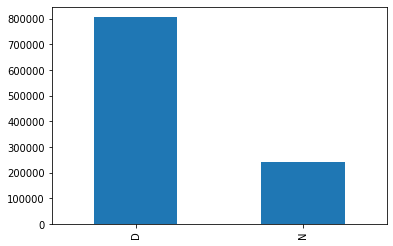

In [ ]:
data_frame['daynight'].value_counts().plot.bar();

> Observation
> * More than 700000 incidents have happened in the day time where as only 200000 (approx.) have happened at night.

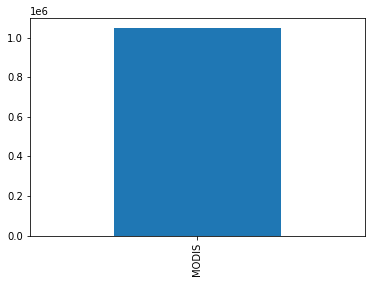

In [ ]:
data_frame['instrument'].value_counts().plot.bar();

> Since acq_date has a cardianality of 1461, it is not possible to plot a bar plot with such high number of values on x axis. Hence, breaking down the values into month and year for better visualization.

In [ ]:
data_frame['month'] = pnd.DatetimeIndex(data_frame['acq_date']).month
data_frame['year'] = pnd.DatetimeIndex(data_frame['acq_date']).year

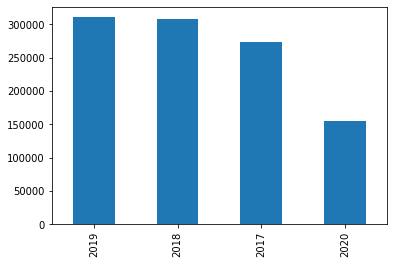

In [ ]:
data_frame['year'].value_counts().plot.bar();

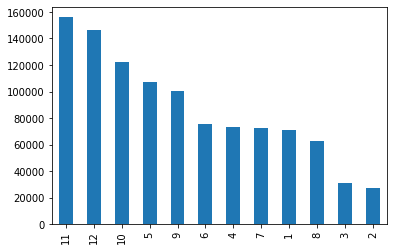

In [ ]:
data_frame['month'].value_counts().plot.bar();



> **b. Heatmap correlation among the variables in the data**



> Getting the correlation values for the dataframe



In [ ]:
data_frame.corr()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type,month,year
latitude,1.00,-0.29,-0.06,0.02,0.02,-0.18,-0.09,0.06,0.13,-0.10,-0.06,0.15,-0.14
longitude,-0.29,1.00,-0.10,-0.09,-0.09,0.06,-0.06,-0.14,-0.24,-0.06,-0.01,0.09,0.23
brightness,-0.06,-0.10,1.00,-0.08,-0.09,-0.26,0.58,-0.00,0.66,0.64,-0.05,0.10,0.00
scan,0.02,-0.09,-0.08,1.00,0.98,-0.02,-0.08,0.03,-0.12,0.24,-0.02,0.02,-0.05
track,0.02,-0.09,-0.09,0.98,1.00,-0.02,-0.08,0.03,-0.12,0.23,-0.02,0.02,-0.06
acq_time,-0.18,0.06,-0.26,-0.02,-0.02,1.00,0.01,-0.05,-0.43,-0.05,0.02,0.05,0.06
confidence,-0.09,-0.06,0.58,-0.08,-0.08,0.01,1.00,0.01,0.26,0.30,-0.04,0.06,-0.01
version,0.06,-0.14,-0.00,0.03,0.03,-0.05,0.01,1.00,0.02,0.01,-0.02,0.07,-0.78
bright_t31,0.13,-0.24,0.66,-0.12,-0.12,-0.43,0.26,0.02,1.00,0.30,-0.05,0.09,-0.04
frp,-0.10,-0.06,0.64,0.24,0.23,-0.05,0.30,0.01,0.30,1.00,-0.02,0.03,-0.01




> Plot the heatmap for the correlation values <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>[4]</a>



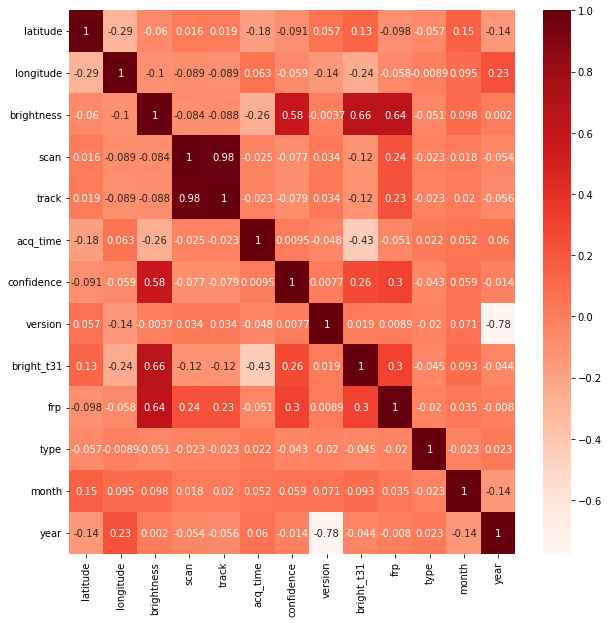

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data_frame.corr(),annot=True, cmap=plt.cm.Reds)


> Observations from heatmap
> * The colorbar on the right - Dark color indicates strong positive correlation and light color indicates strong negative correlation.
> * Scan and track have strong positive correlation between them
> * Version and Year have strong negative correlation as both the features are completely different from each other
> * frp has strong correlation with brightness and bright_t31



> **c. Identifying the data quality issues and build data quality plan**





> The most common data quality issues are:

* Missing values
* Irregular cardinality
* Outliers

> Missing values:

In [ ]:
# To remove missing values
# Drop null values in rows
data_frame.dropna()
# Drop null values in columns
data_frame.dropna(axis='columns')

In [7]:
# Drop duplicate values
df=data_frame.drop_duplicates()

> Irregular cardinality:

> General Issues with irregular cardinality are:

* Features with a cardinality of 1
* Too low cardinality continious features
* Too high cardinality categorical features

> With the above findings for categorical and continuous features, it is observed that 'version' and 'type' columns have very less cardinality. Hence, they can either be dropped or converted to categorical features.

> We will drop 'version' column and 'instrument' column since it has a cardinality of 2 and 1 respectively and would also not have a role in prediction model later. 

> Although the cardinaliy of 'type' column is 3, we will need it for identifying bushfires.

In [ ]:
df = df.drop(['version'], axis=1)
df = df.drop(['instrument'], axis=1)

> Outliers [2]

> * Outliers are those values which lie completely away from all other values in the dataset.
> * Since our target feature is 'FRP' we will be removing outliers only for that feature as it may affect the performance of the model.
>* Calculated the outliers for 'latitude' and 'longitude' as well to show how outliers are calculated.

> latitude

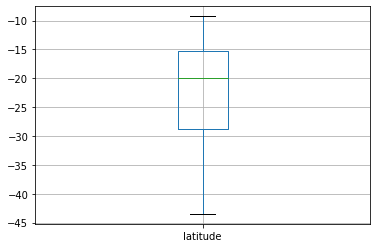

In [8]:
df.boxplot('latitude');

In [9]:
Q1= df['latitude'].quantile(0.25)
Q3= df['latitude'].quantile(0.75)

IQR = Q3-Q1
print(IQR)

13.4697


In [10]:
outliers_df = df[(df['latitude'] < (Q1 - 1.5 * IQR)) | (df['latitude'] > (Q3 + 1.5 * IQR))]
print("Num of outliers: ", len(outliers_df))

Num of outliers:  0


> longitude

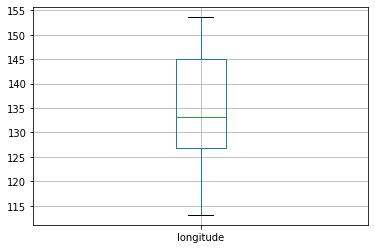

In [11]:
df.boxplot('longitude');

In [12]:
Q1= df['longitude'].quantile(0.25)
Q3= df['longitude'].quantile(0.75)

IQR = Q3-Q1
print(IQR)

18.1562


In [13]:
outliers_df = df[(df['longitude'] < (Q1 - 1.5 * IQR)) | (df['longitude'] > (Q3 + 1.5 * IQR))]
print("Num of outliers: ", len(outliers_df))

Num of outliers:  0


> frp

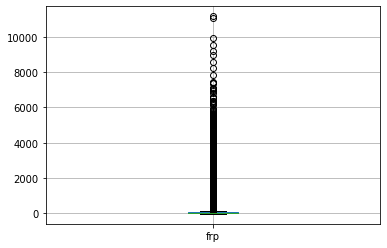

In [14]:
df.boxplot('frp');

In [ ]:
Q1= df['frp'].quantile(0.25)
Q3= df['frp'].quantile(0.75)

IQR = Q3-Q1
print(IQR)

48.9


In [ ]:
outliers_df = df[(df['frp'] < (Q1 - 1.5 * IQR)) | (df['frp'] > (Q3 + 1.5 * IQR))]
print("Num of outliers: ", len(outliers_df))

Num of outliers:  111537


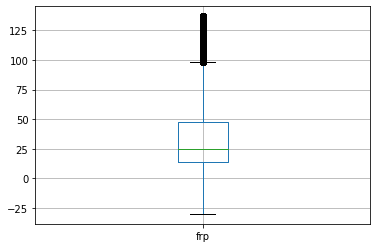

In [ ]:
df.drop(outliers_df.index).boxplot('frp')

2. Data Pre-processing

*   Removing null and duplicate values has already been done in the above section hence, not repeating it here again.
*   Features with cardinality 2 and 3 have already been removed above as they will not help in prediction later. (Version and Instrument)
* In the outliers, after plotting a boxplot of 'frp' and using the formula to calculate the number of outliers, there are 111537 outliers which are removed as 'frp' is our target feature later and these outliers might create issues while predicting.
*   acq_date has been divided with Year and Month, it can be dropped too but since it is to be used when calculating the incidents of bushfire in the later part we're keeping it for now.
*   'acq_time' will not provide any further information when the model is built later, hence removing that as well



In [ ]:
df = df.drop(['acq_time'], axis=1)

In [ ]:
df.head(2)

3.a Date on which Bushfires present the highest number of incidents


*   To find the date with maximum incidents of bushfire, we have first filtered out the acq_date and type column into a new dataframe for all the type=0, because 0 denotes the vegetation fire




In [ ]:
bushfire_df = df.filter(['acq_date', 'type'])[lambda x: x['type'] == 0]
bushfire_df.head(5)




*   Then for the data in the dataframe, count of each value is calculated







In [ ]:
bushfire_df = bushfire_df.apply(pnd.value_counts)



*   Based on 'acq_date' the value with highest number of counts is taken and date corresponding to that is printed




In [ ]:
col = "acq_date"
max_x = bushfire_df.loc[bushfire_df[col].idxmax()]

In [ ]:
print(max_x)

From the above results, it can be seen that **Date - 2020-01-04** has the highest incidents of bushfire

b. Based on the data quality report, the attributes that will not serve much purpose are already removed and from the ones that are left the attributes that would be useful to predict the confidence of the incident are - 


*   brightness
*   frp
*   bright t-31
*   scan
*  track
* year
* month
* Satellite
* confidence

The selected attributes are important because the dataset is about the wildfires in regions of Australia, and for prediction it will need density of fire(brightness) the area it is happening in, year in which it happened. 

Also, from the heatmap generated for correlation it is seen that these attributes are correlated with brightness and bright_t31 being the most correlated with 'FRP'.







### 2. Spatio-temporal data

**1.  Geographical heat map of FRP for the Aqua area for the year of 2017**

> Folium enables both the binding of data to a map and visualizations as markers on the map <a href='https://python-visualization.github.io/folium/'>[5]</a>.

> We will use folium to:

* Plot the center of Australia <a href='https://www.ga.gov.au/scientific-topics/national-location-information/dimensions/centre-of-australia-states-territories'>[6]</a>
* Plot the latitude and longitudes of the median FRP values for each day of 2017 to visualize the geographical heatmap.

> Read the "latitude", "longitude", "FRP", "acq_date", "satellite”, and “acq_date” values from the ‘modis_2017_Australia.csv’ file to create ‘df_max_frp’ data frame with “acq_date” values parsed as dates. Since the geographical heatmap of FRP is required only for the ‘Aqua’ area, we will filter the data using the ‘Aqua’ values of the “satellite” column. 

In [ ]:
file = open("/modis_2017_Australia.csv")
df_2017 = pnd.read_csv(file, 
                 usecols=["latitude", "longitude", "frp",
                 "acq_date", "satellite"], parse_dates=["acq_date"])[lambda x: x['satellite'] == "Aqua"]

> The data frame is then grouped by the date <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html'>[7]</a> for applying the median aggregation method on FRP values for each date. We are using the median aggregation method for plotting the geographical heatmap as the median helps us in avoiding the extreme high and low values, which can be unknown or outliers and untrustworthy due to measurement errors. It gives us the idea of where the center point is located in a dataset. We will be using the median FRP value for each date in the year 2017 to plot the geographical heatmap.

In [ ]:
df_max_frp = df_2017.groupby(pnd.Grouper(key="acq_date"))["frp"].median()

> Create ‘final_df’ list for the corresponding latitude and longitude values of the calculated median FRP values [6].

> Concatenate the ‘final_list’ to create ‘data’ data frame.

In [ ]:
final_df = []
for date, frp in df_max_frp.items():
    final_df.append(df_2017[(df_2017["acq_date"]==date) & (df_2017["frp"]==frp)])

data = pnd.concat(final_df)

> Plot the center of Australia as the base for the geographical heatmap.

In [ ]:
m = folium.Map([-23.07, 132.08], zoom_start=4)

> Plot the FRP using the latitude, longitude, and median FRP values of each date and add it to the map of Australia for visualizing the geographical heatmap <a href='https://stackoverflow.com/questions/61301081/folium-heatmaps'>[8]</a>.

In [ ]:
HeatMap(data=data[['latitude','longitude', 'frp']].groupby(['latitude','longitude',]).sum().reset_index().values.tolist(),radius=12, max_zoom=13).add_to(m)
m

**2. Mark the “Fire activity” (lat, long = -35.6,149.12) on the city map**

> Plot the given latitude (35.6), and longitude (149.12) values on the map using folium.

In [ ]:
map_fa = folium.Map(location=[-35.6,149.12])

> Add a marker of “Fire Activity” <a href='https://python.plainenglish.io/using-folium-to-map-latitude-and-longitude-491f8dcc81ad?gi=8ac091e88876'>[9]</a> with a red-colored fire icon using a folium marker and add it to the map.

In [ ]:
folium.Marker(location = [-35.6,149.12], popup= "Fire Activity", icon = folium.Icon(color='red', icon='fire')).add_to(map_fa)
map_fa

**3. Mark the regions with the highest recorded fire radiation in a day for measurements where "acq_date = 2020-01-08".**


> Read the "latitude", "longitude", "FRP", "acq_date", "satellite”, and “acq_date” values from the ‘modis_2020_Australia.csv’ file to create ‘df_2020’ data frame with “acq_date” values parsed as dates. Since we need to out the highest recorded fire radiation for the date of 2020-01-08, filter the data frame using 2020-01-08 values of “acq_date”. 

In [ ]:
file = open("/modis_2020_Australia.csv")
df_2020 = pnd.read_csv(file, 
                 usecols=["latitude", "longitude", "frp",
                 "acq_date"], parse_dates=["acq_date"])[lambda x: x['acq_date'] == "2020-01-08"]


> Create ‘df_max_frp_2020’ data frame by grouping the ‘df_2020’ using the “acq_date” values and then calculate the maximum values of FRP for each date.

In [ ]:
df_max_frp_2020 = df_2020.groupby(pnd.Grouper(key="acq_date"))["frp"].max()

> Find the corresponding “latitude” and “longitude” values for the calculated maximum FRP value.

In [ ]:
final_df = []
for date, frp in df_max_frp_2020.items():
    final_df.append(df_2020[(df_2020["frp"]==frp)])
data = pnd.concat(final_df)
data.head(1)

,latitude,longitude,acq_date,frp
23118,-32.89,124.10,2020-01-08,11164.10


> Plot the calculated latitude (32.89), and longitude (124.1) values on the map using folium.

In [ ]:
print(data["latitude"])
print(data["longitude"])
map_fa_max = folium.Map(location=[-32.89,124.1])

23118   -32.89
Name: latitude, dtype: float64
23118   124.10
Name: longitude, dtype: float64


> Add a marker of “Highest recorded fire radiation” with a red-colored fire icon using a folium marker and add it to the map.

In [ ]:
folium.Marker(location = [-32.89,124.1], popup= "Highest recorded fire radiation", icon = folium.Icon(color='red', icon="fire")).add_to(map_fa_max)
map_fa_max

**4. Visualization to plot the progress of the fire activity across all points from**
Nov 1, 2019, to Jan 31, 2020.

> Read the values from ‘modis_2019_Australia.csv’ and ‘modis_2020_Australia.csv’ files to create a data frame with “acq_date” values parsed as dates. 

In [ ]:
file2020 = open("/modis_2020_Australia.csv")
file2019 = open("/modis_2019_Australia.csv")
df_2019_2020 = pnd.concat([pnd.read_csv(file, usecols=["acq_date"], parse_dates=["acq_date"]) for file in [file2019, file2020]])

> Filter the values for dates between ‘2019-11-01’ and ‘2020-01-31’ <a href='https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates'>[10]</a>. 

In [ ]:
mask = (df_2019_2020['acq_date'] >= '2019-11-01') & (df_2019_2020['acq_date'] <= '2020-01-31')
df_2019_2020 = df_2019_2020.loc[mask]

> Find the count of incidents for each date.

In [ ]:
df_2019_2020 = df_2019_2020.apply(pnd.value_counts)

> Plot a line chart with dates on the x-axis and the number of incidents or ‘Fire Activity’ on the y-axis for dates from Nov 1, 2019, to Jan 31, 2020.

Text(0, 0.5, 'Fire Activity')

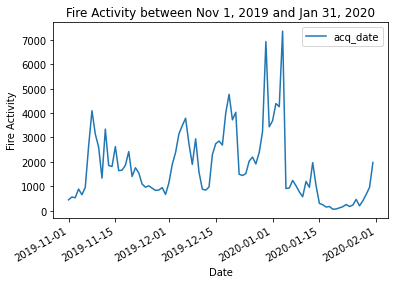

In [ ]:
graph = df_2019_2020.plot.line(title='Fire Activity between Nov 1, 2019 and Jan 31, 2020')
graph.set_xlabel("Date")
graph.set_ylabel("Fire Activity")

> **Observations** : From the graph, it can be observed that there is a rapid hike in fire activity between Dec 22, 2019, and Jan 03, 2020. The highest number of incidents are also observed in the same range. This rapid increase in the fire activity could also be due to the festival season with Christmas and New Year being celebrated in the observed range. The fire activity drops rapidly post the New Year. 

### 3. Model for spatial prediction of wildfire

**1. In between ‘Brightness temperature I-5’ and ‘Fire Radiative Power’ choose either as the target feature.**

> Target feature chosen is - 'Fire Radiative Power' (frp)

**2. Explain what the task you’re solving is (e.g., supervised x unsupervised,
classification x regression x clustering or similarity matching x, etc)**
> The task that is being solved is Supervised Regression because the target feature that needs to be predicted - 'FRP' is a continuous feature and is a labeled dataset and supervised regression is used to predict continuous values.


**3. Use a feature selection method to select the features to build a model.**



*   Feature engineering
> We have performed feature engineering to convert categorical features like ‘dayNight’ and ‘Satellite’ into continuous features by doing one-hot encoding. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction <a href='https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f'>[11]</a>. It will assign binary values to ‘dayNight’ and ‘Satellite’ columns.




In [ ]:
df = pnd.get_dummies(df, columns=['satellite'])

In [ ]:
df = pnd.get_dummies(df, columns=['daynight'])

In [ ]:
df.head(2)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,type,month,year,satellite_Aqua,satellite_Terra,daynight_D,daynight_N
0,-23.91,147.30,320.10,1.70,1.30,2017-01-01,47,53,296.60,17.60,0,1,2017,0,1,1,0
1,-23.69,150.10,314.30,2.70,1.60,2017-01-01,47,22,289.30,30.00,0,1,2017,0,1,1,0


* Correlation Method
> We have then applied the correlation method to select the features. It is important to identify the degree to which variables in the dataset are dependent. The correlation is the statistical summary of the relationship between variables <a href='https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/'>[12]</a> and it will help us identify the features that are highly correlated with the target feature ‘FRP’.


In [ ]:
df_test = df

In [ ]:
cor=df_test.corr()

In [ ]:
cor_target=abs(cor["frp"])

In [ ]:
#Selecting highly correlated features
features = cor_target[cor_target>0.2]
features

brightness   0.64
scan         0.24
track        0.23
confidence   0.30
bright_t31   0.30
frp          1.00
Name: frp, dtype: float64

> In order to decide are correlated features, we have set the threshold to 0.2, and the following features were found to be correlated:
* brightness
* scan
* track
* confidence
* bright_t31
* frp

**4. Select one or more evaluation metrics.**

> We have selected the following three evaluation metrics:
* Root Mean Squared Error (RMSE)
* Mean Absolute Error (MAE)
* R-Squared

> **Root Mean Squared Error (RMSE)**: “Mean Squared Error” finds the average squared error between the actual and predicted values. Root mean squared error (RMSE) is the square root of the mean of the square of all of the errors  <a href='https://www.sciencedirect.com/topics/engineering/root-mean-squared-error'>[13]</a>. Since the errors are squared before they are averaged, the RMSE gives relatively high weight to large errors.
RMSE will be a suitable evaluation metric since its squared nature will help in delivering more robust results by canceling the positive and negative error values <a href='https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/'>[14]</a>. Using it we will be able to avoid the absolute error values while doing the mathematical calculation.

> **Mean Absolute Error (MAE)**: MAE will find the average absolute distance between the predicted and target values <a href='https://en.wikipedia.org/wiki/Mean_absolute_error'>[15]</a>. MAE will measure the average magnitude of the errors in our training and test datasets. 
MAE will be a suitable evaluation metric as it will average the absolute differences between actual and predicted observations.

> **R-Squared**: R-Squared defines how well the data fit in our model. Using the R-Squared values, it can be determined whether the model is over-fit or under-fit [10]. The value of R-Squared should be between zero and one and the closer it is to one, the better the model is. 
R-Squared will be a suitable evaluation for checking whether our model is over or under fit.

**Sampling of dataset**





> * Performed sampling on the dataset as the dataset was too large.
> * Took 40000 values from each year and then shuffled them so that when splitting the training and test dataset has a mix of all the years.





In [ ]:
df_test = df_test[['bright_t31','brightness','scan','track','confidence','frp','year','month']]

In [ ]:
df_test.groupby('year', group_keys=False).apply(lambda x: x.sample(40000)).reset_index().head(2)

,index,bright_t31,brightness,scan,track,confidence,frp,year,month
0,150419,296.10,312.70,1.00,1.00,83,10.20,2017,9
1,106769,301.30,316.00,4.40,1.90,67,69.00,2017,8


In [ ]:

df_test=shuffle(df_test)

In [ ]:
# Create separate object for target variable
y = df_test[['frp']]
# Create separate object for input features
X = df_test.drop('frp', axis=1)

In [ ]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

**5.  Build a baseline model** 

> **Linear Regression**

> We have selected Linear Regression as our baseline model. 
Linear Regression models the relationship between two variables by fitting a linear equation to observed data [38]. In linear regression, the predicted output is continuous with a constant slope. 
We have not performed hyperparameter tuning in this model because it is a basic regression model. The more suitable models to apply hyperparameter tuning would be the Ridge Regression model or the Lasso Regression model. 

> 2. Train and evaluate your model

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred=regr.predict(X_train)

In [ ]:
y_pred=regr.predict(X_test)

In [ ]:
print("Train Results for Linear Regression:")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Linear Regression:
Root mean squared error:  117.14417339370637
R-squared:  0.5269835762705177
Mean Absolute Error:  52.13800544653744


In [ ]:
print("Test Results for Linear Regression:")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Linear Regression:
Root mean squared error:  113.18889805996959
R-squared:  0.5349872343721219
Mean Absolute Error:  51.92028023653353


> 3. How do you make sure not to overfit?

> We have calculated the R-Squared value of the model which is 0.527 and 0.531 for training and test results respectively. Since both the values are between zero and one, the model is not overfitting.

> 4. Visualize the learning process and/or the knowledge acquired by your model.

> The learning curve <a href='https://utkuufuk.com/2018/05/04/learning-curves/'>[16]</a> is the correct visualization for the linear regression because it shows how the model accuracy is changing with respect to the number of training and testing datasets. It also helps us in identifying the overfitting and underfitting of the data.

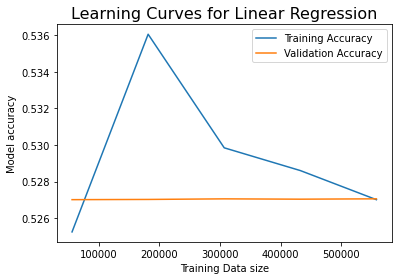

In [ ]:
plt.title("Learning Curves for Linear Regression", fontsize=16)
train_sizes, train_score, test_score, fit_times, _ = learning_curve(regr, X_train, y_train,cv=3, return_times=True)
plt.xlabel("Training Data size")
plt.ylabel("Model accuracy")
plt.plot(train_sizes,np.mean(train_score,axis=1), label = 'Training Accuracy')
plt.plot(train_sizes, np.mean(test_score, axis=1),label = 'Validation Accuracy')
plt.legend(loc='upper right')

> **Observations**: The model accuracy has varied between 0.526 to 0.536 for the training dataset whereas, for the test dataset, it stays consistent throughout. 

> 5. Analyze the results

> Train Results for Linear Regression:

> * Root mean squared error:  117.14417339370637
> * R-squared:  0.5269835762705177
> * Mean Absolute Error:  52.13800544653744

> Test Results for Linear Regression:

> * Root mean squared error:  113.18889805996959
> * R-squared:  0.5349872343721219
> * Mean Absolute Error:  51.92028023653353

> The Root mean squared error and Mean Absolute Error of this model are quite high. Even though the value of R-squared is between zero and one, it is not towards one and hence the model is not very fit.

**6. Build a candidate final model**

> **Decision Tree Regression**

> We have selected the Decision Tree Regression as our final candidate model.

> The decision tree builds regression models in the form of a tree structure. It breaks down the dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed <a href='https://www.saedsayad.com/decision_tree_reg.htm#:~:text=Decision tree builds regression or,decision nodes and leaf nodes.'>[17]</a>. The result is a tree with decision and leaf nodes.

**1. Perform hyperparameter tuning if applicable.**
> We are first running the model with a set of possible hyperparameter values and then using the best estimator method, we identify the best values for tuned params. 

In [ ]:
# Code Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html [18]
params_tuned = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeRegressor(), params_tuned, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='neg_mean_absolute_error')

In [ ]:
model.best_estimator_

DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, min_samples_split=7)

**2. Train and evaluate your model**

> The model is rerun with hyperparameter tuning.

In [ ]:
params_tuned = {'min_samples_split': [5], 'min_samples_leaf': [3], 'max_depth': [7]}
bestEstimator_model = RandomizedSearchCV(DecisionTreeRegressor(), params_tuned, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
bestEstimator_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [7],
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [5]},
                   scoring='neg_mean_absolute_error')

In [ ]:
y_train_pred=bestEstimator_model.predict(X_train)

In [ ]:
y_pred=bestEstimator_model.predict(X_test)

**3. How do you make sure not to overfit?**


In [ ]:
print("Train Results for Decision Tree Regression:")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Decision Tree Regression:
Root mean squared error:  39.560158697574686
R-squared:  0.9460550386715796
Mean Absolute Error:  13.450607451384737


In [ ]:
print("Test Results for Decision Tree Regression:")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Decision Tree Regression:
Root mean squared error:  40.477817598771885
R-squared:  0.9405308967538255
Mean Absolute Error:  13.566913817320783


> We have calculated the R-Squared value of the model which is 0.946 and 0.940 for training and test results respectively. Since both the values are between zero and one, the model is not overfitting.

**4. Visualize the learning process and/or the knowledge acquired by your
model**
> In order to check the knowledge acquired by our model, we are performing a feature importance test on the model which gives us the features on which our target feature FRP is most dependent.

In [ ]:
bestEstimator_model.best_estimator_.feature_importances_

array([0.00079328, 0.67456436, 0.30337725, 0.01358118, 0.00592185,
       0.00176208, 0.        ])

<BarContainer object of 7 artists>

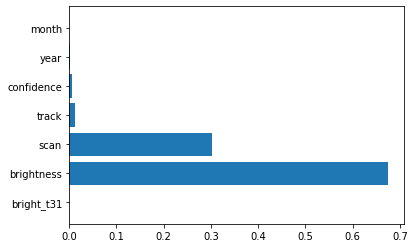

In [ ]:
plt.barh(X_train.columns,bestEstimator_model.best_estimator_.feature_importances_)

**5. Analyze the results**

> Train Results for Decision Tree Regression:

> * Root mean squared error:  39.560158697574686
> * R-squared:  0.9460550386715796
> * Mean Absolute Error:  13.450607451384737

> Test Results for Decision Tree Regression:

> * Root mean squared error:  40.477817598771885
> * R-squared:  0.9405308967538255
> * Mean Absolute Error:  13.566913817320783

> The Root mean squared error and Mean Absolute Error of this model are lower than that of our baseline model. The R-squared value is closer to one and hence the model is in appropriate fit.

7. Statistical Significance Test

> * Performed a paired t-test on both the models for comparing them.
> * Comparison is done on the basis of p value evaluated

In [ ]:
# Code Reference: http://rasbt.github.io/mlxtend/user_guide/evaluate/paired_ttest_resampled/ [19]
t,p = paired_ttest_5x2cv(estimator1=regr,estimator2=bestEstimator_model, X=X, y=y, random_seed = 1)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -52.492
p value: 0.000


> * Since the value of p is less than 0.05, the models are different from each other

> * Calculating the score of each model and then plotting a box plot between them

In [ ]:
score_regr = regr.fit(X_train, y_train).score(X_test, y_test)
score_model = bestEstimator_model.fit(X_train, y_train).score(X_test, y_test)

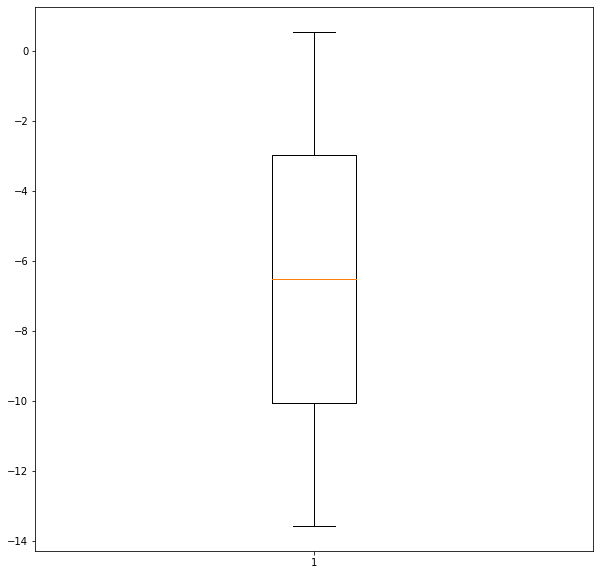

In [ ]:
from matplotlib import pyplot
plt.figure(figsize=(10,10))
pyplot.boxplot([score_regr,score_model])
pyplot.show()

### References:

[1] Kaggle.com. 2022. AUSTRALIA AND INVESTIGATIVE SPECIAL WILDFIRES DATA. [online] Available at: <https://www.kaggle.com/datasets/brsdincer/australia-and-investigative-special-wildfires-data> [Accessed 22 June 2022].

[2] Maksym Taranukhin, “CSCI 4146/6409 Process of Data Science Tutorial 2.” Summer Term, Dalhousie
University, [online document], 2022. [Accessed 22 June 2022]

[3] DataFrame, I. and Singh, G., 2022. Import multiple csv files into pandas and concatenate into one DataFrame. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe> [Accessed 22 June 2022].

[4] Seaborn.pydata.org. 2022. seaborn.heatmap — seaborn 0.11.2 documentation. [online] Available at: <https://seaborn.pydata.org/generated/seaborn.heatmap.html> [Accessed 22 June 2022

[5] "Folium — Folium 0.12.1 documentation", Python-visualization.github.io, 2022. [Online]. Available: https://python-visualization.github.io/folium/. [Accessed: 22- Jun- 2022].

[6] "Centre of Australia States and Territories | Geoscience Australia", Ga.gov.au, 2022. [Online]. Available: https://www.ga.gov.au/scientific-topics/national-location-information/dimensions/centre-of-australia-states-territories . [Accessed: 22- Jun- 2022].

[7] Pandas.pydata.org. 2022. pandas.Grouper — pandas 1.4.2 documentation. [online] Available at: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html> [Accessed 22 June 2022].

[8] Heatmaps, F., Hansen, D., Hansen, D. and Azevedo, W., 2022. Folium Heatmaps. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/61301081/folium-heatmaps> [Accessed 22 June 2022].

[9] Medium. 2022. Map Latitude and Longitude Coordinates with Folium. [online] Available at: <https://python.plainenglish.io/using-folium-to-map-latitude-and-longitude-491f8dcc81ad?gi=8ac091e88876> [Accessed 22 June 2022].

[10] dates, S. and Jose, C., 2022. Select DataFrame rows between two dates. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates> [Accessed 22 June 2022].

[11] "What is One Hot Encoding? Why and When Do You Have to Use it? | HackerNoon", Hackernoon.com, 2022. [Online]. Available: 
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f [Accessed: 22- Jun- 2022].

[12] J.  Brownlee, "How to Calculate Correlation Between Variables in Python", Machine Learning Mastery, 2022. [Online]. Available: 
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/ [Accessed: 23- Jun- 2022].

[13] Root Mean Squared Error, 2022, [online] Stack Overflow. Available at: <https://www.sciencedirect.com/topics/engineering/root-mean-squared-error> [Accessed 22 June 2022].

[14] Analytics Vidhya. 2022. Evaluation Metrics Machine Learning. [online] Available at: <https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/> [Accessed 22 June 2022].


[15] En.wikipedia.org. 2022. Mean absolute error - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Mean_absolute_error> [Accessed 22 June 2022].

[16] Ufuk, U., 2022. Learning Curves in Linear & Polynomial Regression. [online] Utku's Blog. Available at: <https://utkuufuk.com/2018/05/04/learning-curves/> [Accessed 22 June 2022].

[17] Saedsayad.com. 2022. *Decision Tree Regression*
. [online] Available at: <https://www.saedsayad.com/decision_tree_reg.htm#:~:text=Decision tree builds regression or,decision nodes and leaf nodes.> [Accessed 22 June 2022].

[18] sklearn, U. and Muller, J., 2022. *Using decision tree regression and cross-validation in sklearn*
. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/44682307/using-decision-tree-regression-and-cross-validation-in-sklearn> [Accessed 22 June 2022].

[19] Raschka, S., 2022. paired_ttest_resample: Resampled paired *t* test - mlxtend. [online] Rasbt.github.io. Available at: <http://rasbt.github.io/mlxtend/user_guide/evaluate/paired_ttest_resampled/> [Accessed 22 June 2022].